In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(X_train, y_train) , (X_valid, y_valid) = mnist.load_data()

In [3]:
X_train.shape
# This shows us we have 60,000 training images, each of which is a 28*28 matrix of values

(60000, 28, 28)

In [4]:
y_train.shape
# This is the amount of labels (60,000, so 1 per number, which makes sense)

(60000,)

In [5]:
y_train[0:12]
# The first dozen of labels

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

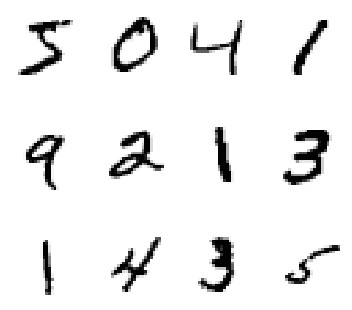

In [6]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3,4,k+1)
    plt.imshow(X_train[k],cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
X_valid.shape
# This shows us we have 10,000 test images, each of which is a 28*28 matrix of values

(10000, 28, 28)

In [8]:
y_valid.shape
# This is the amount of labels (10,000, so 1 per number, which makes sense)

(10000,)

In [9]:
X_valid[0]
# These are the actual values of the pixels where 0 is white and 255 is black

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

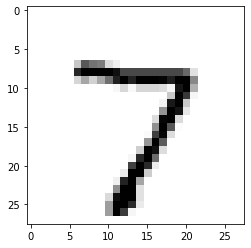

Actual Number: 7


In [10]:
plt.imshow(X_valid[0],cmap='Greys')
plt.show()
print(f'Actual Number: {y_valid[0]}')

In [11]:
X_train = X_train.reshape(60000,784).astype('float32')
X_valid = X_valid.reshape(10000,784).astype('float32')
# Reshaping the training and testing inputs

In [12]:
X_train /= 255
X_valid /= 255
# The values of the pixels are no longer integers from 0 to 255; they now range from 0 to 1

In [13]:
X_valid[0]
# Other than proving the last cell, check out the new dimension

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)
# Converting them from integers into one-hot encodings
# n_classes = 10 because there are 10 possible digits

In [15]:
y_valid[0]
# Notice how the 7 is now represented like a one-hot encoding (it is in index number 7) Binary encoding, sort of!?

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [16]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape = (784,)))
model.add(Dense(10, activation = 'softmax'))

'''
Creating the network!!!
1. First line instantiates the simplest type of neural network model object, the sequential type
2. Second line adds the network's only hidden layer, with 64 neurons that use the sigmoid function; the 784 describes
   the shape of the input layer
3. Third line adds the output layer, 10 neurons (1 for each of the possible outcomes) of the softmax variety
'''

"\nCreating the network!!!\n1. First line instantiates the simplest type of neural network model object, the sequential type\n2. Second line adds the network's only hidden layer, with 64 neurons that use the sigmoid function; the 784 describes\n   the shape of the input layer\n3. Third line adds the output layer, 10 neurons (1 for each of the possible outcomes) of the softmax variety\n"

In [17]:
model.summary()
'''
The first number of parameters, 50240, is obtained by multiplying 784, the input shape, by 64, the number of neurons in the 
hidden layer, and then adding 64. We multiply those numbers because we are dealing with a dense, fully connected network, so
all the neurons in one layer are connected to the rest. Those are the weights. There is also one bias per neuron in the 
hidden layer so that is why we add the 64.

The second number of parameters, 650, is obtained by 64 * 10 + 10. Use the same logic as above.

We specified no hyper-parameters.
'''

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


'\nThe first number of parameters, 50240, is obtained by multiplying 784, the input shape, by 64, the number of neurons in the \nhidden layer, and then adding 64. We multiply those numbers because we are dealing with a dense, fully connected network, so\nall the neurons in one layer are connected to the rest. Those are the weights. There is also one bias per neuron in the \nhidden layer so that is why we add the 64.\n\nThe second number of parameters, 650, is obtained by 64 * 10 + 10. Use the same logic as above.\n\nWe specified no hyper-parameters.\n'

In [18]:
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])
# THIS IS OUT OF ORDER IN THE BOOK, I RAN THIS HERE BECAUSE THE NEXT CELL WILL GIVE AN ERROR IF I DON'T RUN THIS

In [19]:
model.fit(X_train, y_train,
          batch_size=128, epochs=200,
          verbose=1,
          validation_data=(X_valid, y_valid))
'''
Training the network!!!

Validation Accuracy (val_acc) is the proportion of the 10,000 handwritten images in X_valid in which the network's 
probability in the output layer corresponds to the correct digit as per the lables in y_valid.

Following the first epoch of training, we observe that val_acc equals 0.1179. That is, 12 percent of the images from the 
held-out validation dataset were correctly classified by our shallow architecture. Given that there are 10 classes of 
handwritten digits, we'd expect a random process to guess 10 percent of the digits correctly by chance, so this is not an 
impressive result. As the network continues to train, however, the results improve. After 10 epochs of training, it is 
correctly classifying 31.73 percent of the validation images- far better than would be expected by chance! And this is only 
the beginning: After 200 epochs, the network's improvement appears to be plateauing as it approaches 87 percent validation 
accuracy. Since we consrtucted an uninvolved, shallow neural network architecture, this is not too shabby!

NOTE: The val_acc varies between instances since ANNs (Artificial Neural Networks) are stochastic (random). The values 
registered in the paragraph above were recorded during the first instance in which it was run. THE VALUES ARE LIKELY
DIFFERENT NOW!!!
'''




Train on 60000 samples, validate on 10000 samples
Epoch 1/200





60000/60000 [==============================] - 1s 23us/step - loss: 0.0920 - acc: 0.0792 - val_loss: 0.0916 - val_acc: 0.0969
Epoch 2/200
60000/60000 [==============================] - 1s 19us/step - loss: 0.0913 - acc: 0.1089 - val_loss: 0.0910 - val_acc: 0.1317
Epoch 3/200
60000/60000 [==============================] - 1s 19us/step - loss: 0.0907 - acc: 0.1402 - val_loss: 0.0905 - val_acc: 0.1640
Epoch 4/200
60000/60000 [==============================] - 1s 20us/step - loss: 0.0902 - acc: 0.1693 - val_loss: 0.0900 - val_acc: 0.1880
Epoch 5/200
60000/60000 [==============================] - 1s 22us/step - loss: 0.0898 - acc: 0.1917 - val_loss: 0.0896 - val_acc: 0.2051
Epoch 6/200
60000/60000 [==============================] - 1s 18us/step - loss: 0.0894 - acc: 0.2093 - val_loss: 0.0892 - val_acc: 0.2200
Epoch 7/200
60000/60000 [==============================] - 1s 18us/step - loss: 0.0891 - acc: 0.2231 - val_loss: 0

60000/60000 [==============================] - 1s 16us/step - loss: 0.0731 - acc: 0.5127 - val_loss: 0.0726 - val_acc: 0.5221
Epoch 49/200
60000/60000 [==============================] - 1s 15us/step - loss: 0.0726 - acc: 0.5157 - val_loss: 0.0720 - val_acc: 0.5263
Epoch 50/200
60000/60000 [==============================] - 1s 15us/step - loss: 0.0721 - acc: 0.5207 - val_loss: 0.0715 - val_acc: 0.5304
Epoch 51/200
60000/60000 [==============================] - 1s 17us/step - loss: 0.0716 - acc: 0.5256 - val_loss: 0.0710 - val_acc: 0.5350
Epoch 52/200
60000/60000 [==============================] - 1s 18us/step - loss: 0.0711 - acc: 0.5288 - val_loss: 0.0705 - val_acc: 0.5397
Epoch 53/200
60000/60000 [==============================] - 1s 19us/step - loss: 0.0706 - acc: 0.5336 - val_loss: 0.0700 - val_acc: 0.5441
Epoch 54/200
60000/60000 [==============================] - 1s 22us/step - loss: 0.0701 - acc: 0.5377 - val_loss: 0.0695 - val_acc: 0.5483
Epoch 55/200
60000/60000 [==============

Epoch 107/200
60000/60000 [==============================] - 1s 15us/step - loss: 0.0478 - acc: 0.7458 - val_loss: 0.0469 - val_acc: 0.7606
Epoch 108/200
60000/60000 [==============================] - 1s 15us/step - loss: 0.0474 - acc: 0.7470 - val_loss: 0.0466 - val_acc: 0.7622
Epoch 109/200
60000/60000 [==============================] - 1s 15us/step - loss: 0.0471 - acc: 0.7484 - val_loss: 0.0463 - val_acc: 0.7635
Epoch 110/200
60000/60000 [==============================] - 1s 15us/step - loss: 0.0468 - acc: 0.7500 - val_loss: 0.0460 - val_acc: 0.7652
Epoch 111/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.0465 - acc: 0.7517 - val_loss: 0.0457 - val_acc: 0.7660
Epoch 112/200
60000/60000 [==============================] - 1s 15us/step - loss: 0.0462 - acc: 0.7531 - val_loss: 0.0454 - val_acc: 0.7681
Epoch 113/200
60000/60000 [==============================] - 1s 15us/step - loss: 0.0459 - acc: 0.7541 - val_loss: 0.0451 - val_acc: 0.7700
Epoch 114/200
60000/

60000/60000 [==============================] - 1s 15us/step - loss: 0.0344 - acc: 0.8100 - val_loss: 0.0334 - val_acc: 0.8217
Epoch 166/200
60000/60000 [==============================] - 1s 15us/step - loss: 0.0343 - acc: 0.8116 - val_loss: 0.0333 - val_acc: 0.8227
Epoch 167/200
60000/60000 [==============================] - 1s 15us/step - loss: 0.0341 - acc: 0.8133 - val_loss: 0.0331 - val_acc: 0.8245
Epoch 168/200
60000/60000 [==============================] - 1s 15us/step - loss: 0.0339 - acc: 0.8154 - val_loss: 0.0329 - val_acc: 0.8266
Epoch 169/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0338 - acc: 0.8166 - val_loss: 0.0327 - val_acc: 0.8276
Epoch 170/200
60000/60000 [==============================] - 1s 15us/step - loss: 0.0336 - acc: 0.8180 - val_loss: 0.0326 - val_acc: 0.8289
Epoch 171/200
60000/60000 [==============================] - 1s 15us/step - loss: 0.0334 - acc: 0.8195 - val_loss: 0.0324 - val_acc: 0.8302
Epoch 172/200
60000/60000 [=======

"\nTraining the network!!!\n\nValidation Accuracy (val_acc) is the proportion of the 10,000 handwritten images in X_valid in which the network's \nprobability in the output layer corresponds to the correct digit as per the lables in y_valid.\n\nFollowing the first epoch of training, we observe that val_acc equals 0.1179. That is, 12 percent of the images from the \nheld-out validation dataset were correctly classified by our shallow architecture. Given that there are 10 classes of \nhandwritten digits, we'd expect a random process to guess 10 percent of the digits correctly by chance, so this is not an \nimpressive result. As the network continues to train, however, the results improve. After 10 epochs of training, it is \ncorrectly classifying 31.73 percent of the validation images- far better than would be expected by chance! And this is only \nthe beginning: After 200 epochs, the network's improvement appears to be plateauing as it approaches 87 percent validation \naccuracy. Since 